# PCA on MNIST

This notebook illustrates Principal Component Analysis on the MNIST dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm

import torch
from torchvision import datasets, transforms

We load MNIST and display some examples.

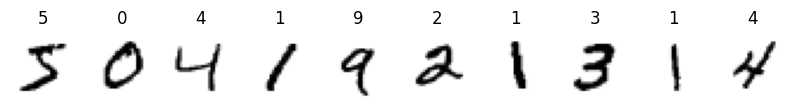

In [8]:
dataset = datasets.MNIST('./data', transform=transforms.ToTensor(), download=True)
images = dataset.data.numpy()
labels = dataset.targets.numpy()

pltsize=1
plt.figure(figsize=(10*pltsize, pltsize*1.1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(images[i].reshape(28,28), cmap="gray_r")
    plt.title(labels[i])
plt.show()

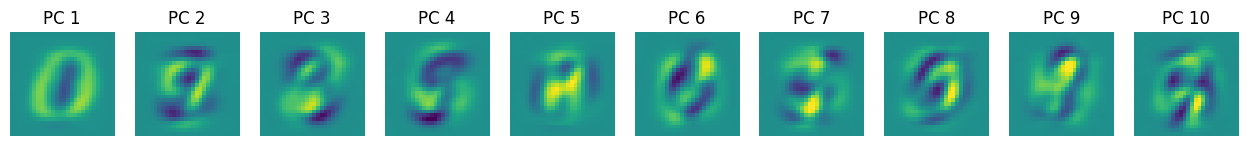

In [11]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(images.reshape(-1, 28 * 28))
fig = plt.figure(figsize=(n_components * np.power(n_components, 1 / 5), 3))
axes = []
for i in range(n_components):
    ax_ = fig.add_subplot(1, n_components, i + 1)
    ax_.imshow(pca.components_[i].reshape(28, 28), interpolation='nearest', clim=(-.15, .15))
    ax_.set_title(f'PC {i + 1}')
    ax_.axis('off')

    axes.append(ax_)